In [1]:
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Neural network - Surrogate model

Epoch 1/100


c:\Users\mbhag\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2457 - mae: 0.4126 - val_loss: 0.1463 - val_mae: 0.3510
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1123 - mae: 0.2995 - val_loss: 0.0608 - val_mae: 0.1976
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0433 - mae: 0.1573 - val_loss: 0.0386 - val_mae: 0.1507
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0354 - mae: 0.1469 - val_loss: 0.0355 - val_mae: 0.1486
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0310 - mae: 0.1403 - val_loss: 0.0345 - val_mae: 0.1427
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0304 - mae: 0.1361 - val_loss: 0.0309 - val_mae: 0.1410
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0311 - mae: 0.1439 - val_loss: 0.0303 - val_mae: 0.1365
Epoch 8/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0247 - mae: 0.1235 - val_loss: 0.0295 - val_mae: 0.1305
Epoch 9/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0257 - mae: 0.1

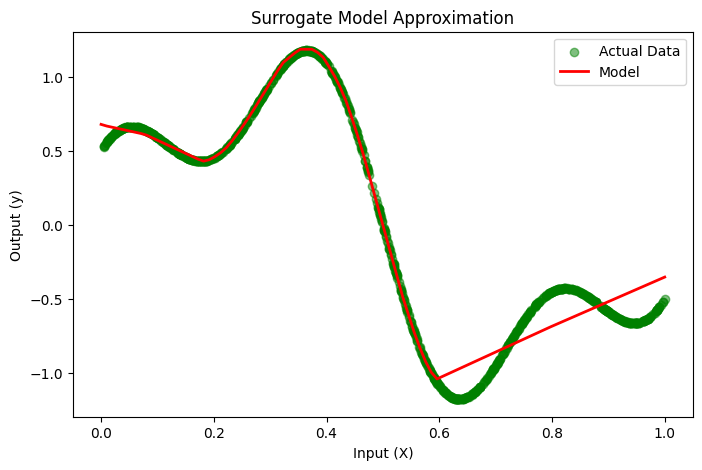

In [5]:
def ideal_function(x):
    return np.sin(2 * np.pi * x) + 0.5 * np.cos(5 * np.pi * x)

# Trainig data
np.random.seed(42)
X = np.random.rand(1000, 1)  # Random samples between 0 and 1
y = ideal_function(X)  # True function values


# Feature normalizing
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1))

# Data splitting
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)


# Model construction Multi layer preceptron

model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(1,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test), verbose=1)

# Testing
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test MAE: {test_mae}")

# Comparing with true function
X_plot = np.linspace(0, 1, 100).reshape(-1, 1)
X_plot_scaled = scaler_X.transform(X_plot)
y_pred_scaled = model.predict(X_plot_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled)

# Plotting
plt.figure(figsize=(8, 5))
plt.scatter(X, y, label="Actual Data", color='green', alpha=0.5)
plt.plot(X_plot, y_pred, label="Model", color='red', linewidth=2)
plt.xlabel("Input (X)")
plt.ylabel("Output (y)")
plt.legend()
plt.title("Surrogate Model Approximation")
plt.show()

In [27]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 64)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,061 (51.02 KB)

 Trainable params: 4,353 (17.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8,708 (34.02 KB)

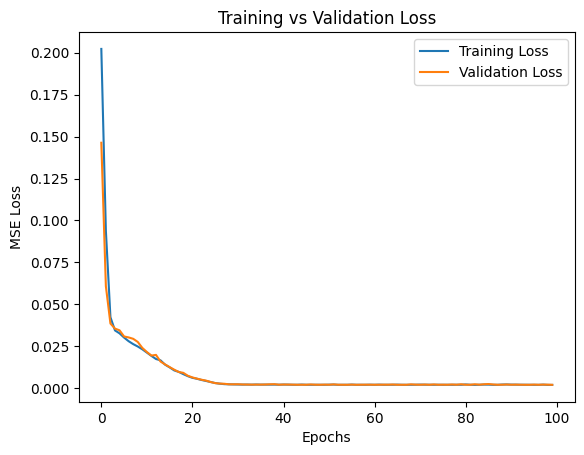

In [6]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()